DataFrames for all four categories saved to CSV files.


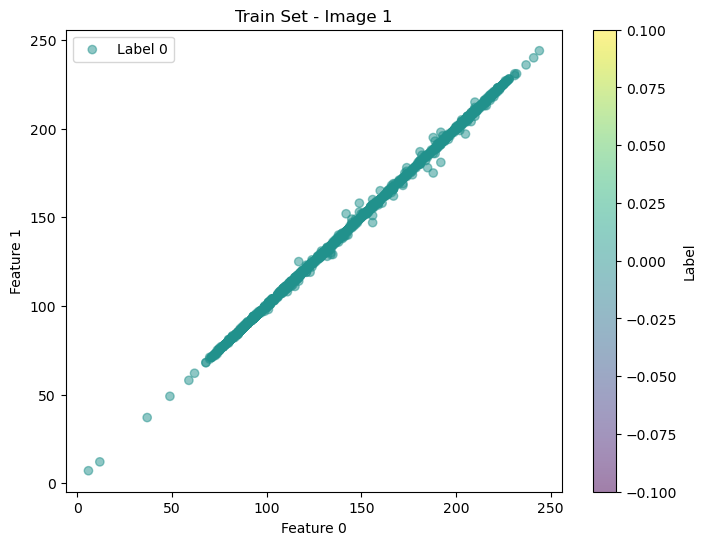

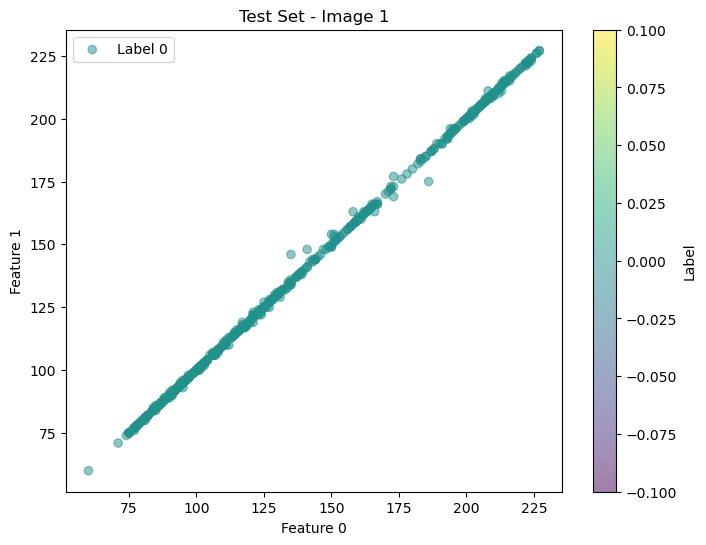

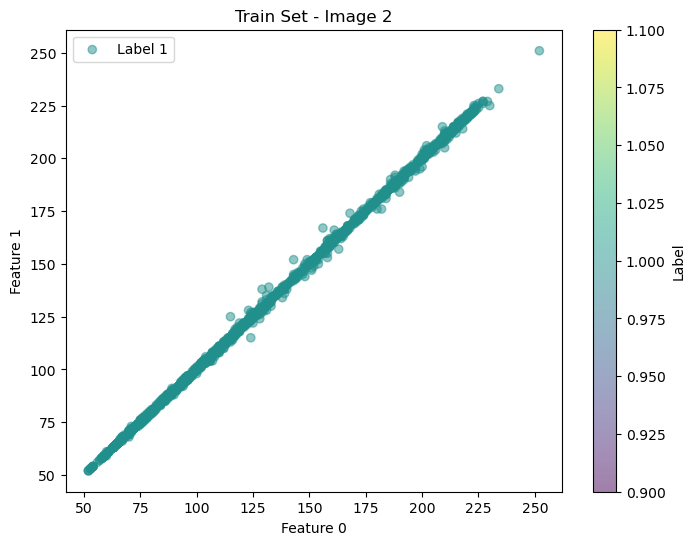

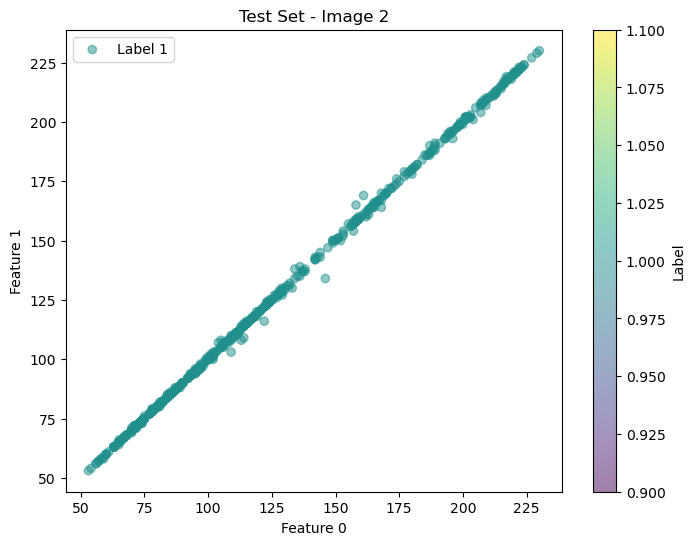

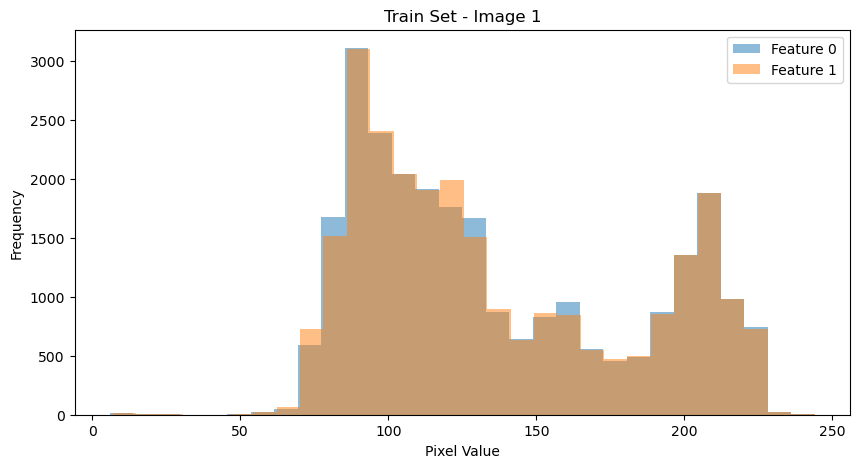

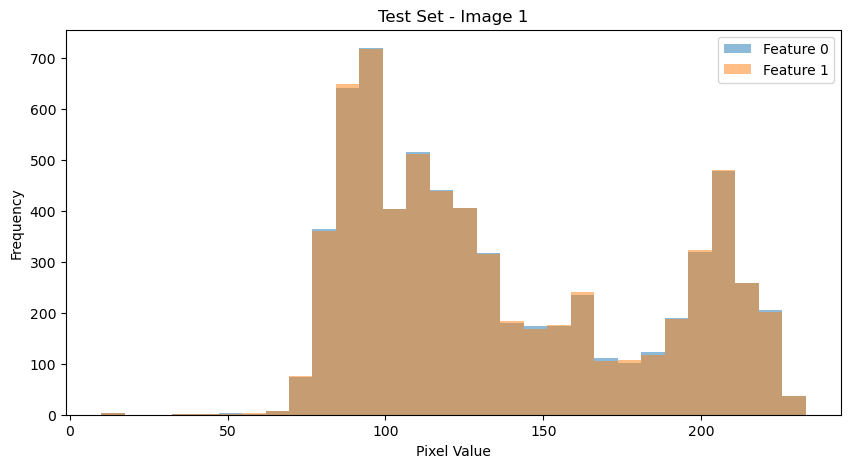

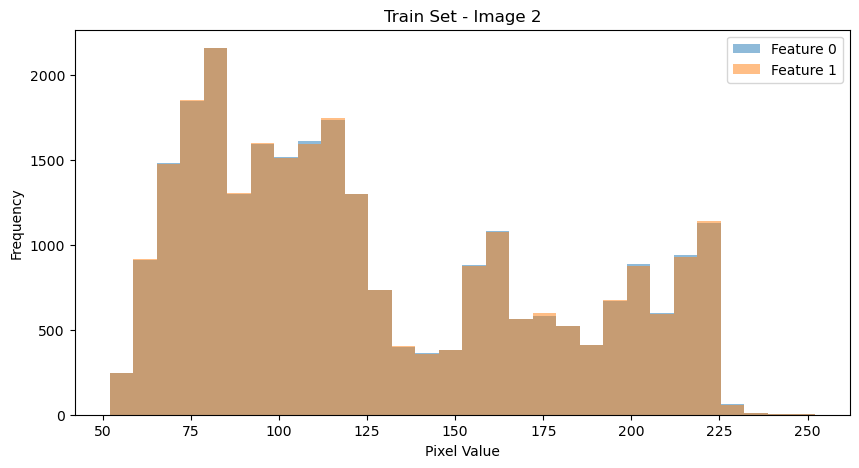

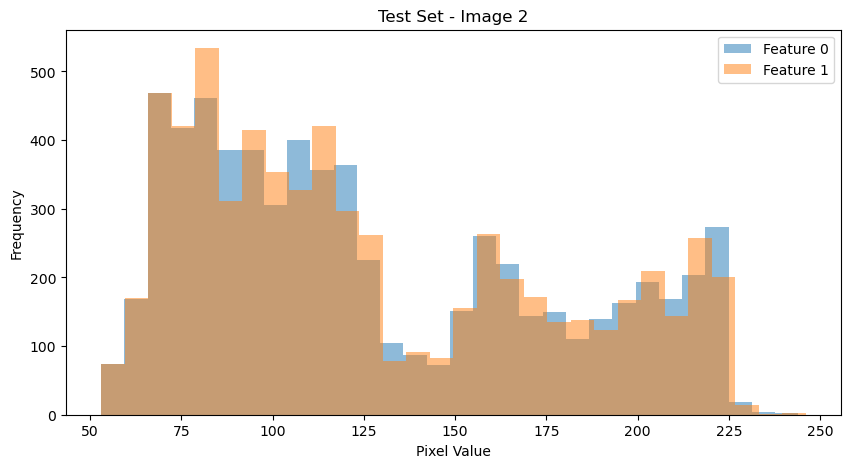

DataFrame 1 - Feature 0: Mean=136.24, Variance=2138.59
DataFrame 1 - Feature 1: Mean=136.23, Variance=2136.88
DataFrame 2 - Feature 0: Mean=136.80, Variance=2142.73
DataFrame 2 - Feature 1: Mean=136.80, Variance=2142.53
DataFrame 3 - Feature 0: Mean=126.60, Variance=2427.83
DataFrame 3 - Feature 1: Mean=126.59, Variance=2427.52
DataFrame 4 - Feature 0: Mean=127.13, Variance=2431.16
DataFrame 4 - Feature 1: Mean=127.12, Variance=2433.19


In [54]:
############################################################################################################################
#################################################### TASK 1 ################################################################
############################################################################################################################

import pandas as pd
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def image_to_block_vectors(image, label, block_size=16):
    vectors = []
    h, w = image.shape
    if h % block_size != 0 or w % block_size != 0:
        print("Warning: Image dimensions are not divisible by 16. Trimming the image.")
        h = (h // block_size) * block_size
        w = (w // block_size) * block_size
        image = image[:h, :w]
    for i in range(0, h, block_size):
        for j in range(0, w, block_size):
            block = image[i:i+block_size, j:j+block_size]
            vector = block.flatten()
            vector = np.append(vector, label)
            vectors.append(vector)
    return vectors
# Load and process images
xx_gray = cv2.cvtColor(cv2.imread(r"C:\Users\willh\OneDrive\Documents\CSC410ProjectPt2\data\birdsDataset-main\Cardinals_in_color\frame-08-02-202286.jpg"), cv2.COLOR_BGR2GRAY)
yy_gray = cv2.cvtColor(cv2.imread(r"C:\Users\willh\OneDrive\Documents\CSC410ProjectPt2\data\birdsDataset-main\Cardinals_in_color\frame-08-02-2022111.jpg"), cv2.COLOR_BGR2GRAY)
# Get feature vectors with labels
vectors_image1 = image_to_block_vectors(xx_gray, label=0)
vectors_image2 = image_to_block_vectors(yy_gray, label=1)
# Split each image's vectors into training and testing sets
train_vectors1, test_vectors1 = train_test_split(vectors_image1, test_size=0.2, random_state=42)
train_vectors2, test_vectors2 = train_test_split(vectors_image2, test_size=0.2, random_state=42)
# Convert to DataFrames
df_train_image1 = pd.DataFrame(train_vectors1)
df_test_image1 = pd.DataFrame(test_vectors1)
df_train_image2 = pd.DataFrame(train_vectors2)
df_test_image2 = pd.DataFrame(test_vectors2)
# Save each DataFrame to a CSV file
df_train_image1.to_csv('train_image1.csv', index=False, header=False)
df_test_image1.to_csv('test_image1.csv', index=False, header=False)
df_train_image2.to_csv('train_image2.csv', index=False, header=False)
df_test_image2.to_csv('test_image2.csv', index=False, header=False)
print("DataFrames for all four categories saved to CSV files.")
# Select two features (e.g., columns 0 and 1 for pixel values in flattened vectors)
feature_1 = 0  # first pixel in block
feature_2 = 1  # second pixel in block
# Function to plot scatter plots
def plot_scatter(df, feature_1, feature_2, label, title):
    plt.figure(figsize=(8, 6))
    # Subset if the plot is too dense
    df_subset = df.sample(frac=0.1, random_state=42) if len(df) > 1000 else df
    plt.scatter(df_subset[feature_1], df_subset[feature_2], c=df_subset[df.columns[-1]], cmap='viridis', alpha=0.5, label=f'Label {label}')
    plt.title(title)
    plt.xlabel(f"Feature {feature_1}")
    plt.ylabel(f"Feature {feature_2}")
    plt.colorbar(label="Label")
    plt.legend()
    plt.show()
# Plot scatter plots for the selected features
plot_scatter(df_train_image1, feature_1, feature_2, label=0, title="Train Set - Image 1")
plot_scatter(df_test_image1, feature_1, feature_2, label=0, title="Test Set - Image 1")
plot_scatter(df_train_image2, feature_1, feature_2, label=1, title="Train Set - Image 2")
plot_scatter(df_test_image2, feature_1, feature_2, label=1, title="Test Set - Image 2")
# Histograms and mean/variance calculations (same as before)
def plot_histograms(df, feature_indices, title):
    plt.figure(figsize=(10, 5))
    for feature_idx in feature_indices:
        plt.hist(df[feature_idx], bins=30, alpha=0.5, label=f'Feature {feature_idx}')
    plt.title(title)
    plt.xlabel("Pixel Value")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()
# Plot histograms for the selected features
plot_histograms(df_train_image1, [feature_1, feature_2], "Train Set - Image 1")
plot_histograms(df_test_image1, [feature_1, feature_2], "Test Set - Image 1")
plot_histograms(df_train_image2, [feature_1, feature_2], "Train Set - Image 2")
plot_histograms(df_test_image2, [feature_1, feature_2], "Test Set - Image 2")
# Calculate and print mean and variance for the features
for i, df in enumerate([df_train_image1, df_test_image1, df_train_image2, df_test_image2], start=1):
    mean_f1 = df[feature_1].mean()
    var_f1 = df[feature_1].var()
    mean_f2 = df[feature_2].mean()
    var_f2 = df[feature_2].var()
    print(f"DataFrame {i} - Feature {feature_1}: Mean={mean_f1:.2f}, Variance={var_f1:.2f}")
    print(f"DataFrame {i} - Feature {feature_2}: Mean={mean_f2:.2f}, Variance={var_f2:.2f}")

In [55]:
############################################################################################################################
#################################################### TASK 2 ################################################################
############################################################################################################################

import pandas as pd
from sklearn.linear_model import ElasticNet
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

# Load and combine training data from both CSV files
df_train1 = pd.read_csv('train_image1.csv', header=None)
df_train2 = pd.read_csv('train_image2.csv', header=None)
df_train = pd.concat([df_train1, df_train2], ignore_index=True)
# Separate features and target
X_train = df_train.iloc[:, :-1].values  # All columns except the last for features
y_train = df_train.iloc[:, -1].values   # The last column as target (binary)
# Initialize and train Elastic-Net model (for regression)
model = ElasticNet(alpha=1.0, l1_ratio=0.5)
model.fit(X_train, y_train)
# Function to add predictions to a test set, save the result, and construct/save confusion matrices
def add_predictions_to_test_set(test_file, model, threshold=0.5):
    # Load test data
    df_test = pd.read_csv(test_file, header=None)
    # Separate features and actual labels
    X_test = df_test.iloc[:, :-1].values
    y_test = df_test.iloc[:, -1].values
    # Predict and binarize predictions
    y_pred = model.predict(X_test)
    y_pred_binary = (y_pred > threshold).astype(int)  # Threshold for binary classification
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred_binary)
    print(f"Accuracy on {test_file}: {accuracy * 100:.2f}%")
    # Calculate precision and recall
    conf_matrix = confusion_matrix(y_test, y_pred_binary)
    tn, fp, fn, tp = conf_matrix.ravel()  # unpacking the confusion matrix
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    print(f"Precision on {test_file}: {precision * 100:.2f}%")
    print(f"Recall on {test_file}: {recall * 100:.2f}%")
    # Add columns for actual and predicted labels
    df_test['Actual Label'] = y_test
    df_test['Predicted Label'] = y_pred_binary
    # Generate dynamic headers
    num_features = df_test.shape[1] - 2  # Exclude 'Actual Label' and 'Predicted Label'
    feature_headers = [f'Feature{i+1}' for i in range(num_features)]
    headers = feature_headers + ['Actual Label', 'Predicted Label']
    # Check header alignment
    assert len(headers) == df_test.shape[1], f"Header count {len(headers)} does not match data columns {df_test.shape[1]}"
    # Save the full output
    output_file = test_file.replace('.csv', '_with_predictions_task2.csv')
    df_test.to_csv(output_file, index=False, header=headers)
    print(f"Full output saved as '{output_file}'")
    # Construct and save confusion matrix
    conf_matrix_output = test_file.replace('.csv', '_confusion_matrix_task2.csv')
    conf_matrix_df = pd.DataFrame(conf_matrix, 
                                   index=["Actual Negative", "Actual Positive"], 
                                   columns=["Predicted Negative", "Predicted Positive"])
    conf_matrix_df.to_csv(conf_matrix_output)
    print(f"Confusion matrix saved as '{conf_matrix_output}'")
    
    # Construct and save confusion matrix
    #conf_matrix = confusion_matrix(y_test, y_pred_binary)
    #conf_matrix_output = test_file.replace('.csv', '_confusion_matrix.csv')
    # Save directly as a CSV using NumPy
    #np.savetxt(conf_matrix_output, conf_matrix, delimiter=',', fmt='%d', 
           #header='Predicted Negative,Predicted Positive', comments='Actual,Predicted')
    #print(f"Confusion matrix saved as '{conf_matrix_output}'")

    
    #conf_matrix = confusion_matrix(y_test, y_pred_binary)
    #conf_matrix_output = test_file.replace('.csv', '_confusion_matrix.csv')
    #np.savetxt(conf_matrix_output, conf_matrix, delimiter=',', fmt='%d', header='True Negative,False Positive,False Negative,True Positive', comments='')
    #print(f"Confusion matrix saved as '{conf_matrix_output}'")

# Apply model and save to both test sets
add_predictions_to_test_set('test_image1.csv', model)
add_predictions_to_test_set('test_image2.csv', model)

Accuracy on test_image1.csv: 42.89%
Precision on test_image1.csv: 0.00%
Recall on test_image1.csv: 0.00%
Full output saved as 'test_image1_with_predictions_task2.csv'
Confusion matrix saved as 'test_image1_confusion_matrix_task2.csv'
Accuracy on test_image2.csv: 62.45%
Precision on test_image2.csv: 100.00%
Recall on test_image2.csv: 62.45%
Full output saved as 'test_image2_with_predictions_task2.csv'
Confusion matrix saved as 'test_image2_confusion_matrix_task2.csv'


In [1]:
############################################################################################################################
#################################################### TASK 3 ################################################################
############################################################################################################################

import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Input
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from keras.utils import to_categorical

# Load and combine training data from both CSV files
df_train1 = pd.read_csv('train_image1.csv', header=None)
df_train2 = pd.read_csv('train_image2.csv', header=None)
df_train = pd.concat([df_train1, df_train2], ignore_index=True)
# Separate features and target
X_train = df_train.iloc[:, :-1].values  # All columns except the last for features
y_train = df_train.iloc[:, -1].values   # The last column as target (binary or multiclass)
# Check if it’s binary or multi-class
num_classes = len(pd.Series(y_train).unique())
if num_classes == 2:
    # Binary classification setup
    y_train = (y_train == 1).astype(int)  # Ensure binary target as 0 and 1
    output_units = 1
    loss_function = 'binary_crossentropy'
    final_activation = 'sigmoid'
else:
    # Multi-class setup
    y_train = to_categorical(y_train, num_classes=num_classes)
    output_units = num_classes
    loss_function = 'categorical_crossentropy'
    final_activation = 'softmax'
# Initialize the Sequential model
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(output_units, activation=final_activation))
# Compile the model
model.compile(optimizer='adam', loss=loss_function, metrics=['accuracy'])
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)
# Function to evaluate the model on a test set
# Function to evaluate the model on a test set
def evaluate_model(test_file, model, num_classes, threshold=0.5):
    # Load test data
    df_test = pd.read_csv(test_file, header=None)
    # Separate features and actual labels
    X_test = df_test.iloc[:, :-1].values
    y_test = df_test.iloc[:, -1].values
    # Predict and convert to binary/multi-class predictions
    y_pred_probs = model.predict(X_test)
    if num_classes == 2:
        # Binary classification thresholding
        y_pred = (y_pred_probs > threshold).astype(int).flatten()
    else:
        # Multi-class predictions
        y_pred = y_pred_probs.argmax(axis=1)
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    # Print metrics
    print(f"Accuracy on {test_file}: {accuracy * 100:.2f}%")
    print(f"Precision on {test_file}: {precision:.2f}")
    print(f"Recall on {test_file}: {recall:.2f}")
    # Add columns for actual and predicted labels
    df_test['Actual Label'] = y_test
    df_test['Predicted Label'] = y_pred
    # Generate dynamic headers
    num_features = df_test.shape[1] - 2  # Exclude 'Actual Label' and 'Predicted Label'
    feature_headers = [f'Feature{i+1}' for i in range(num_features)]
    headers = feature_headers + ['Actual Label', 'Predicted Label']
    # Check header alignment
    assert len(headers) == df_test.shape[1], f"Header count {len(headers)} does not match data columns {df_test.shape[1]}"
    # Save the full output with predictions
    output_file = test_file.replace('.csv', '_with_predictions_task3.csv')
    df_test.to_csv(output_file, index=False, header=headers)
    print(f"Full output saved as '{output_file}'")
    # Construct and save confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred, labels=range(num_classes))
    conf_matrix_output = test_file.replace('.csv', '_confusion_matrix_task3.csv')
    conf_matrix_df = pd.DataFrame(conf_matrix, 
                                  index=[f"Actual {i}" for i in range(conf_matrix.shape[0])], 
                                  columns=[f"Predicted {i}" for i in range(conf_matrix.shape[1])])
    conf_matrix_df.to_csv(conf_matrix_output)
    print(f"Confusion matrix saved as '{conf_matrix_output}'")
# Apply model and evaluate on both test sets
evaluate_model('test_image1.csv', model, num_classes=num_classes)
evaluate_model('test_image2.csv', model, num_classes=num_classes)

Epoch 1/50
1620/1620 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4966 - loss: 4.8855
Epoch 2/50
1620/1620 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5075 - loss: 0.7782
Epoch 3/50
1620/1620 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5248 - loss: 0.7003
Epoch 4/50
1620/1620 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5230 - loss: 0.6927
Epoch 5/50
1620/1620 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5002 - loss: 0.6934
Epoch 6/50
1620/1620 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4979 - loss: 0.6932
Epoch 7/50
1620/1620 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4999 - loss: 0.6932
Epoch 8/50
1620/1620 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5011 - loss: 0.6932
Epoch 9/50
1620/1620 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4942 - loss: 0.6940
Epoch 10/50
1620/1620 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5015 - loss: 0.6932
Epoch 11/50
1620/1620 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4983 - loss: 0.6932
Epoch 12/50
1620/1620 ━━━━━━━━

In [62]:
############################################################################################################################
#################################################### TASK 4 ################################################################
############################################################################################################################

import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Input
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# Function to evaluate the model
def evaluate_model(test_file, model, is_rf=False):
    # Load test data
    df_test = pd.read_csv(test_file, header=None)
    # Separate features and actual labels
    X_test = df_test.iloc[:, :-1].values
    y_test = df_test.iloc[:, -1].values
    # Predict probabilities and convert to binary predictions for Keras model
    if not is_rf:
        y_pred_probs = model.predict(X_test)
        y_pred = (y_pred_probs > 0.5).astype(int)  # Threshold for binary classification
    else:
        # Direct predictions for Random Forest
        y_pred = model.predict(X_test)
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)
    # Print metrics
    print(f"Metrics for {test_file}:")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    # Save confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    # Creating confusion matrix DataFrame
    if conf_matrix.shape[0] == 2 and conf_matrix.shape[1] == 2:  # Binary classification
        conf_matrix_df = pd.DataFrame(conf_matrix, index=["Actual Negative", "Actual Positive"], 
                                       columns=["Predicted Negative", "Predicted Positive"])
    else:  # For cases where not all classes are present
        unique_classes = sorted(set(y_test) | set(y_pred))
        conf_matrix_df = pd.DataFrame(conf_matrix, index=[f'Actual {cls}' for cls in unique_classes], 
                                       columns=[f'Predicted {cls}' for cls in unique_classes])
    print("Confusion Matrix:")
    print(conf_matrix_df)
    conf_matrix_output = test_file.replace('.csv', '_confusion_matrix_task4.csv')
    conf_matrix_df.to_csv(conf_matrix_output)
    print(f"Confusion matrix saved as '{conf_matrix_output}'")
# Load and combine training data from both CSV files
df_train1 = pd.read_csv('train_image1.csv', header=None)
df_train2 = pd.read_csv('train_image2.csv', header=None)
df_train = pd.concat([df_train1, df_train2], ignore_index=True)
# Separate features and target
X_train = df_train.iloc[:, :-1].values  # All columns except the last for features
y_train = df_train.iloc[:, -1].values   # The last column as target (binary or multiclass)
# Initialize the Sequential model
model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))  # Use Input layer as the first layer
model.add(Dense(128, activation='relu'))  # First hidden layer
model.add(Dense(64, activation='relu'))  # Second hidden layer
model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)
# Apply model and evaluate on both test sets
evaluate_model('test_image1.csv', model)
evaluate_model('test_image2.csv', model)
# Train Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
# Evaluate both models
print("\nEvaluating Keras Model on test_image1.csv:")
evaluate_model('test_image1.csv', model)
print("\nEvaluating Random Forest Model on test_image1.csv:")
evaluate_model('test_image1.csv', rf_model, is_rf=True)
print("\nEvaluating Keras Model on test_image2.csv:")
evaluate_model('test_image2.csv', model)
print("\nEvaluating Random Forest Model on test_image2.csv:")
evaluate_model('test_image2.csv', rf_model, is_rf=True)

Epoch 1/50
1620/1620 ━━━━━━━━━━━━━━━━━━━━ 2s 845us/step - accuracy: 0.5007 - loss: 5.1946
Epoch 2/50
1620/1620 ━━━━━━━━━━━━━━━━━━━━ 1s 843us/step - accuracy: 0.5109 - loss: 0.8122
Epoch 3/50
1620/1620 ━━━━━━━━━━━━━━━━━━━━ 1s 847us/step - accuracy: 0.5214 - loss: 0.7025
Epoch 4/50
1620/1620 ━━━━━━━━━━━━━━━━━━━━ 1s 846us/step - accuracy: 0.5245 - loss: 0.7370
Epoch 5/50
1620/1620 ━━━━━━━━━━━━━━━━━━━━ 1s 874us/step - accuracy: 0.5309 - loss: 0.6924
Epoch 6/50
1620/1620 ━━━━━━━━━━━━━━━━━━━━ 2s 928us/step - accuracy: 0.4939 - loss: 0.6935
Epoch 7/50
1620/1620 ━━━━━━━━━━━━━━━━━━━━ 1s 817us/step - accuracy: 0.4966 - loss: 0.6934
Epoch 8/50
1620/1620 ━━━━━━━━━━━━━━━━━━━━ 1s 867us/step - accuracy: 0.4966 - loss: 0.6933
Epoch 9/50
1620/1620 ━━━━━━━━━━━━━━━━━━━━ 1s 833us/step - accuracy: 0.4990 - loss: 0.6933
Epoch 10/50
1620/1620 ━━━━━━━━━━━━━━━━━━━━ 1s 809us/step - accuracy: 0.5031 - loss: 0.6932
Epoch 11/50
1620/1620 ━━━━━━━━━━━━━━━━━━━━ 1s 803us/step - accuracy: 0.4996 - loss: 0.6932
Epoch 12

Metrics for test_image2.csv:
Accuracy: 65.77%
Precision: 1.00
Recall: 0.66
F1 Score: 0.79
Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative                   0                   0
Actual Positive                2218                4262
Confusion matrix saved as 'test_image2_confusion_matrix_task4.csv'


(1) Describe the quantitative differences between the built-in measures and the confusion-matrix-based
measures that you used in the analysis to compare the models with the four categories of datasets.

Answer (1): The keras model, when applied for test_image1.csv, displayed nearly perfect classification at a rate of 99.98%, however its high accuracy score is mostly due to the class distribution with most instances being negatives. A precision of 1.00 indicates that all predicted positives were truly positive. A recall of 1.00 suggests that the model correctly captured all actual positives. the F1 score of 1.00 indicates a perfect balance between precision and recall. When the keras model was used on test_image2.csv, the accuracy score was 0.00%, and the precision, recall, and F1 score were also 0.00 which indicates that the model was unable to make any positive predictions.
When using the random forest model on test_image1.csv, the accuracy score was 67.31%, meaning the model is reasonably accurate, but not as accurate as the keras model for the same image. The precision was 1.00 which suggests that the positives predicted by the model are all true positives. The recall was 0.67 which means that only about two-thirds of the actual positives were identified. The F1 score was 0.80 which is a good balance but not as balanced as the Keras model for the same image. When the random forest model was applied to test_image2.csv, the accuracy was 65.77% which is notably better than the accuracy score for the same image when using the Keras model, but it is still quite inaccurate. The precision score of 1.00 implies all positive predictions were correct, but this is misleading due to a lack of actual positives identified. The recall score was 0.66 which indicates that only two-thirds of the true positives were correctly identified in the dataset. The F1 score of 0.79 shows that there is some balance between precision and recall, but the overall performance is lacking due to a low number of actual positive identifications.
For the confusion matricies, when the Keras model was applied to test_image1.csv the confusion matrix indicates that it misclassified only one negative as a positive, while the Random Forest model had significant misclassifications (2118 false positives). For test_image2.csv, both models failed entirely to identify any positives, with the confusion matrices reflecting complete misclassification.
For test_image1.csv, the Keras model excels in accuracy, precision, recall, and F1 score, which is backed by a confusion matrix that shows its ability to distinguish between classes effectively. The Random Forest model, while reasonably accurate, shows weaknesses in recall and F1 score due to a considerable number of false positives.
For test_image2.csv, both models struggle significantly with this dataset, but the Keras model's complete failure indicates potential overfitting or a lack of suitable features in the training data. The Random Forest model, though slightly better, also fails to identify any positives.

(2) Compare all the results (qualitative measures) and determine which pair (a model and a category of feature
vectors) is superior among the ones that you considered. Use your data and findings to support this result.

Answer (2): The Keras model excelled in performance on test_image1.csv as it displayed perfect precision and recall, yet it failed entierly on test_image2.csv which may indicate that it does not generalize well or handle class imbalance properly. The random forest model was better at handling the second dataset, test_image2.csv, with a decent accuracy of 65.77% and capturing some positive instances, yet it did not perform well on test_image1.csv on accuracy and recall. These results indicate that for test_image1.csv, the Keras model performs better due to its high accuracy and perfect scores across all qualitative measures, though for test_image2.csv the random forest model has better performance as it achieved 65.77% accuracy and captured a significant portion of the positive class. Overall, the random forest model was better for this dataset because of its ability to handle different class distributions, particularly for test_image2.csv. The Keras model is more useful for cases where the class distribution aligns closely with its training but is less reliable in cases of imbalance.